# Titanic Dataset

> This module loads and checks the dataset from the Kaggle Titanic ML Competition

In [ ]:
#| default_exp titanic_checkData

In [ ]:
#| export
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

import os # interact with system directories and files
import wandb # log data and models with Weights and Biases
# import weave # interactive analytics

# %load_ext autoreload
# %autoreload 2

In [ ]:
#| export
dataPath = '/Users/danc/Data/titanic'
for dirname, _, filenames in os.walk(dataPath):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/danc/Data/titanic/test.csv
/Users/danc/Data/titanic/train.csv
/Users/danc/Data/titanic/gender_submission.csv


In [ ]:
#| export
train_data = pd.read_csv(os.path.join(dirname, 'train.csv'))
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#| hide
# weave.show(train_data)

In [ ]:
#| export
test_data = pd.read_csv(os.path.join(dirname, 'test.csv'))
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<Axes: >

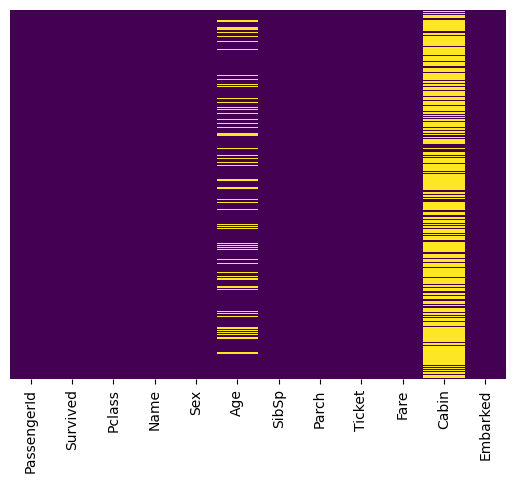

In [ ]:
#| hide
# Exploratory Data Analysis
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#| export
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#imputer.fit([train_data['Age']])
#age_imputed = imputer.transform([train_data['Age']])
#train_data['Age'] = [age_imputed]

#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer
#imp = IterativeImputer(max_iter=10, random_state=0)
#imp.fit([train_data['Age'],train_data['Pclass']])
#t_transfm = imp.transform([train_data['Age'],train_data['Pclass']])
#train_data['Age'] = t_transfm[:,0]
#train_data['Pclass'] = t_transfm[:,1]

<Axes: >

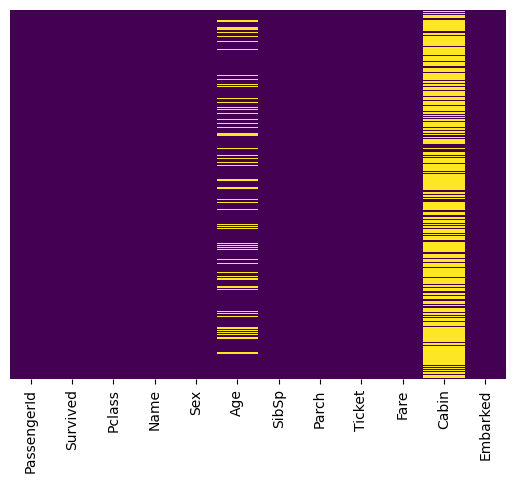

In [ ]:
#| hide
# Exploratory Data Analysis
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

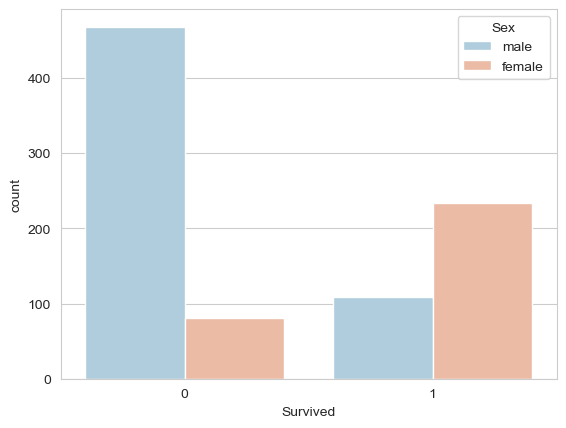

In [ ]:
#| hide
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train_data,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

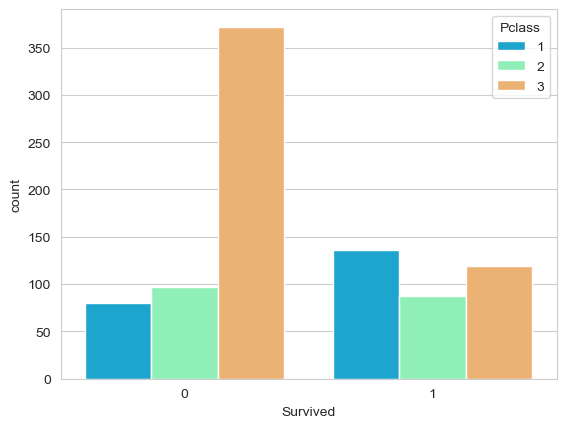

In [ ]:
#| hide
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train_data,palette='rainbow')

In [ ]:
#| export
wandb.login() # log in Weights and Biases to upload and log data

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: p051tr0n00000. Use `wandb login --relogin` to force relogin


True

In [ ]:
#| export
run = wandb.init(project="Kaggle_Titanic", job_type="add-dataset")
artifact = wandb.Artifact(name="Titanic_data", type="dataset")
artifact.add_dir(local_path=dataPath)  # Add dataset directory to artifact
run.log_artifact(artifact)  # Logs the artifact version "Titanic_data:v0"
run.finish()

wandb: Adding directory to artifact (/Users/danc/Data/titanic)... Done. 0.1s
wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()